In [22]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from dlp.dataset import Dataset
from parksim.trajectory_predict.data_processing.utils import TransformerDataProcessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Load dataset
ds = Dataset()

home_path = str(Path.home()) + '/MPCLab'
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

In [74]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=300)[100]
all_instance_tokens = frame['instances']
#all_instance_tokens

In [75]:
all_frames = []
frame_token = scene['first_frame']
while frame_token:
    all_frames.append(frame_token)
    frame = ds.get('frame', frame_token)
    frame_token = frame['next']
len(all_frames)

11301

In [76]:
ds.get('scene', ds.list_scenes()[0])

{'scene_token': '66045def24565e370dff814aa01e8ffed07318b9',
 'filename': 'DJI_0012',
 'timestamp': '2020-08-08 10:08:03',
 'first_frame': '840d7356e46973280c5e71d628fc3b240bfd040a',
 'last_frame': '989b3f56582cdc1af8b1a5a51693bd83327851c9',
 'agents': ['a1b3619e3bc68c3de29af54ba9ff3de96c7de3dc',
  '44bcb749f3901204f4aba6e35615f5e026d7c4cc',
  '961c7ae677f816c35c7b1fc4eed6ff57735cd8a2',
  'ca0c3dce6f63c54c628f69579fdeb0b35c3574b3',
  'b737b285b16639d88bf1c31d05e77ad8f469faa4',
  'ef0a913c3e13777fadd656b22356d7a9d07fc5fd',
  '4dbcdf8732d527e19b2a5d48c238afac7e1c8276',
  'cf6b2d0a13cf2c7c957e698876f3631a1568e288',
  '3d268470233f41fda2590bf806809ec8b56911c0',
  '6458199fb85cccc9725285b59d0d62db70a4d7c1',
  '15dced130fd87b366a213fc3c4128dd8dd57f212',
  'e9c0d3af6541cc4b145966155b7be04e303e6c1f',
  '1b5cf3891abd3f3ff9b5f700815c18482356069f',
  '6e88e73bec8ff10705b244cfdc8f30f05df1b61a',
  '15a9eda80ab9365ad382a8cffb70ca89dd23f49a',
  'c55f10a20fb268ccb6d55b685e3145049bb3a844',
  'b659cc2494

In [77]:
extractor = TransformerDataProcessor(ds = ds)

/home/nidhi/MPCLab/dlp-dataset/dlp/visualizer.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([[idx+1, area, *points[r][c], *points[r][c+1], *points[r+1][c+1], *points[r+1][c]]])
/home/nidhi/MPCLab/dlp-dataset/dlp/visualizer.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([[idx+1, area, *points[r][c], *points[r][c+1], *points[r+1][c+1], *points[r+1][c]]])
/home/nidhi/MPCLab/dlp-dataset/dlp/visualizer.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([[idx+1, area, *points[r][c], *points[r][c+1], *points[r+1][c+1], *points[r+1][c]]])
/home/nidhi/MPCLab/dlp-dataset/dlp/visualizer.py:81: FutureWarning: The frame.append method is deprecated and will be removed from panda

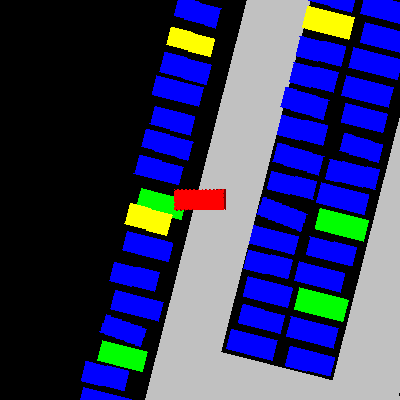

In [80]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=300)[90]
inst_token = frame['instances'][1]

instance = ds.get('instance', inst_token)
current_state = np.array([instance['coords'][0], instance['coords'][1], instance['heading'], instance['speed']])

img_frame = extractor.vis.plot_frame(frame['frame_token'])
img = extractor.vis.inst_centric(img_frame, inst_token)
display(img)

In [81]:
instances, instance_indices = extractor.filter_instances(frame['frame_token'], 10, 10, 10)
print(instances)
for instance_token in instances:
    print(instance_token)
    print(extractor.get_instance_index(instance_token, ds.get('instance', instance_token)['agent_token']))

['f37ef31b5875b9d9b70a3b32a39700ee8701ddf5', '22450800e0565d3c31d28ace9db98dca1b1ceda5', 'c6f23646a85c88cf0c0d5564d6cec3f267a248e9', '0c83a20bcb391801aa37860b9e3ac39d62ad89e6', 'bdd2c7a75d7efaf74d2af76ba2f80768a4e09d9a']
f37ef31b5875b9d9b70a3b32a39700ee8701ddf5
(90, 11300)
22450800e0565d3c31d28ace9db98dca1b1ceda5
(90, 11300)
c6f23646a85c88cf0c0d5564d6cec3f267a248e9
(90, 11300)
0c83a20bcb391801aa37860b9e3ac39d62ad89e6
(90, 6355)
bdd2c7a75d7efaf74d2af76ba2f80768a4e09d9a
(90, 11300)


In [82]:
ds.get('instance', instance_token)

{'instance_token': 'bdd2c7a75d7efaf74d2af76ba2f80768a4e09d9a',
 'agent_token': '4dbcdf8732d527e19b2a5d48c238afac7e1c8276',
 'frame_token': 'ce1300f680e66b492cd3ad61075f60361968a269',
 'coords': [3.2600000000093132, 14.520000000018626],
 'heading': -1.5664926535897932,
 'speed': 1.55,
 'acceleration': [-0.3984, 0.0871],
 'mode': 'incoming',
 'prev': '89a35fbf3dc7c7ca95d24fa82a9f8ac7dab0dcff',
 'next': '7241ba3b6b04a412bbb1952a8e8b1753f1ab0012'}

In [86]:
from parksim.trajectory_predict.data_processing.create_dataset import get_data_for_instance
img, past, future = get_data_for_instance(instances[1], 90, frame['frame_token'], extractor, ds)
print(past)
print(future)

[[ 3.00540919 -0.61702154 -0.1883    ]
 [ 2.67519157 -0.53605041 -0.174     ]
 [ 2.34497396 -0.45507928 -0.1572    ]
 [ 2.00259681 -0.36688693 -0.1382    ]
 [ 1.67484835 -0.29560617 -0.1172    ]
 [ 1.33494036 -0.2171042  -0.0947    ]
 [ 0.99750153 -0.1482926  -0.0711    ]
 [ 0.66253186 -0.08917136 -0.0471    ]
 [ 0.33003135 -0.0397405  -0.0232    ]
 [ 0.          0.          0.        ]]
[[-0.33972172  0.03727134  0.022     ]
 [-0.67697428  0.06485231  0.0435    ]
 [-1.03113842  0.07780459  0.0648    ]
 [-1.38530256  0.09075687  0.0858    ]
 [-1.72483802  0.08679757  0.1067    ]
 [-2.0546831   0.08530743  0.1273    ]
 [-2.36267829  0.07906524  0.1475    ]
 [-2.63666405  0.06084979  0.1667    ]
 [-2.8815787   0.05004181  0.1843    ]
 [-3.08526272  0.03942011  0.2001    ]]


[3.00540919 2.67519157 2.34497396 2.00259681 1.67484835 1.33494036
 0.99750153 0.66253186 0.33003135 0.        ]
[-0.61702154 -0.53605041 -0.45507928 -0.36688693 -0.29560617 -0.2171042
 -0.1482926  -0.08917136 -0.0397405   0.        ]
[-0.33972172 -0.67697428 -1.03113842 -1.38530256 -1.72483802 -2.0546831
 -2.36267829 -2.63666405 -2.8815787  -3.08526272]
[0.03727134 0.06485231 0.07780459 0.09075687 0.08679757 0.08530743
 0.07906524 0.06084979 0.05004181 0.03942011]
[62.53000000002794, 67.5800000000745]


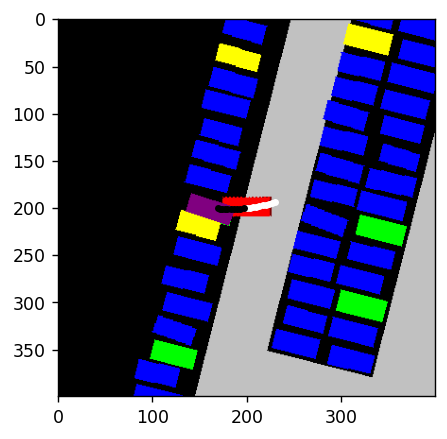

In [87]:
img_fr = extractor.vis.plot_frame(frame['frame_token'])
im = extractor.vis.inst_centric(img_fr, instances[1])
im = extractor.label_target_spot(instances[1], im)
print(past[:,0])
print(past[:,1])
print(future[:,0])
print(future[:,1])
print(ds.get('instance', instances[1])['coords'])
# I'm unsure how to plot the past/future because of the scaling of pixels to distance, plus the top left is 0,0 instead of the center
plt.plot(10*past[:,0]+200, 10*past[:,1]+200, marker='.', color='white')
plt.plot(10*future[:,0]+200, 10*future[:,1]+200, marker='.', color='black')
plt.imshow(im)
plt.show()

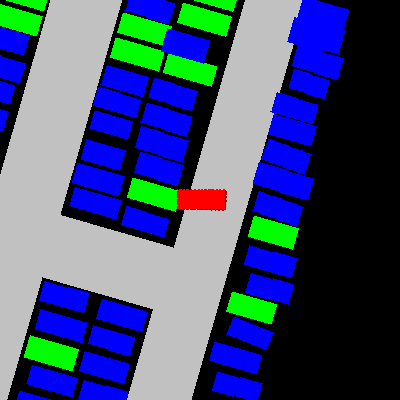

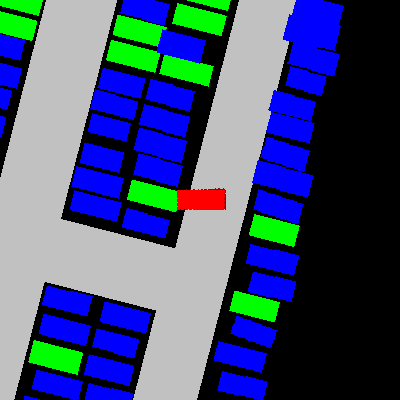

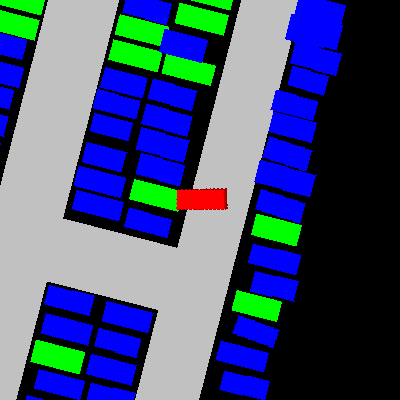

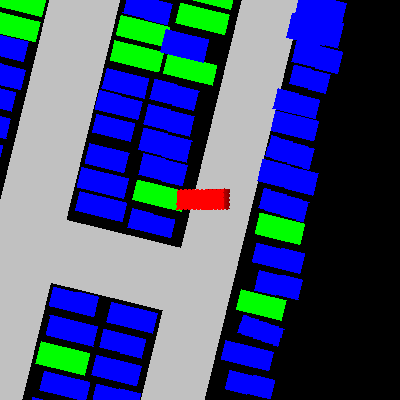

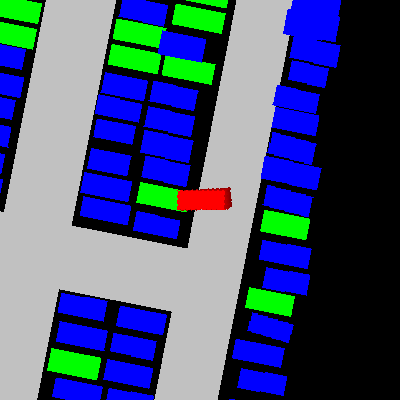

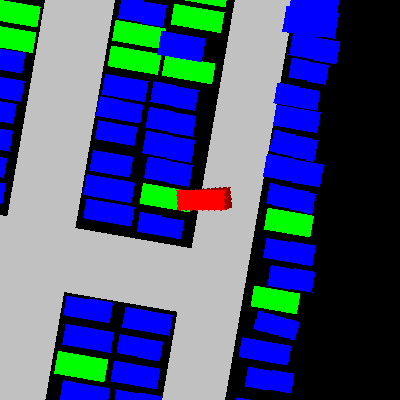

In [58]:
indices = [30, 55, 80, 105, 130, 155]
curr_inst = ds.get('instance', instances[0])
all_instances = ds.get_agent_instances(curr_inst['agent_token'])
for i in indices:
    fr = ds.get_future_frames(scene['first_frame'],timesteps=300)[i]
    img_fr = extractor.vis.plot_frame(fr['frame_token'])
    im = extractor.vis.inst_centric(img_fr, all_instances[i]['instance_token'])
    display(im)

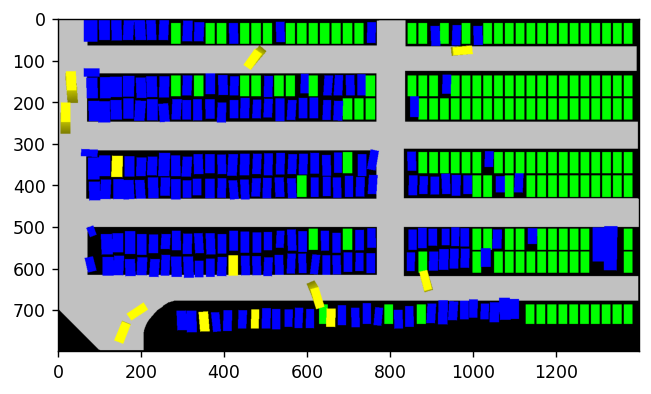

In [26]:
plt.imshow(np.array(img_frame))

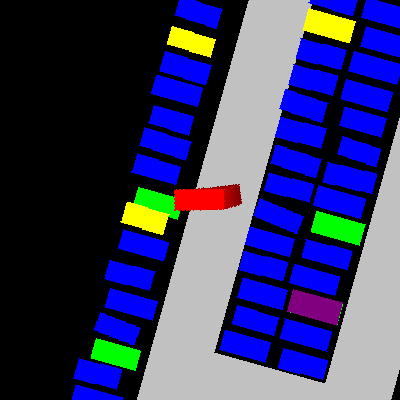

In [5]:

all_spots = extractor.get_parking_spots_from_instance(inst_token, frame)
spot_centers = extractor.detect_center(inst_token, 'spot')
#selected_spot_index = extractor.get_intent_label(inst_token, spot_centers)
labeled_img = extractor.label_spot(all_spots[1], inst_token, frame)
display(labeled_img)


In [1]:
import numpy as np

In [9]:
image_features = np.load('%s_image_feature.npy' % '/home/paperfront/ParkSim/python/parksim/trajectory_predict/data/DJI_0008', allow_pickle=True)

In [11]:
image_features = np.array([np.asarray(img) for img in image_features])

In [13]:
image_features.shape

(1363, 400, 400, 3)